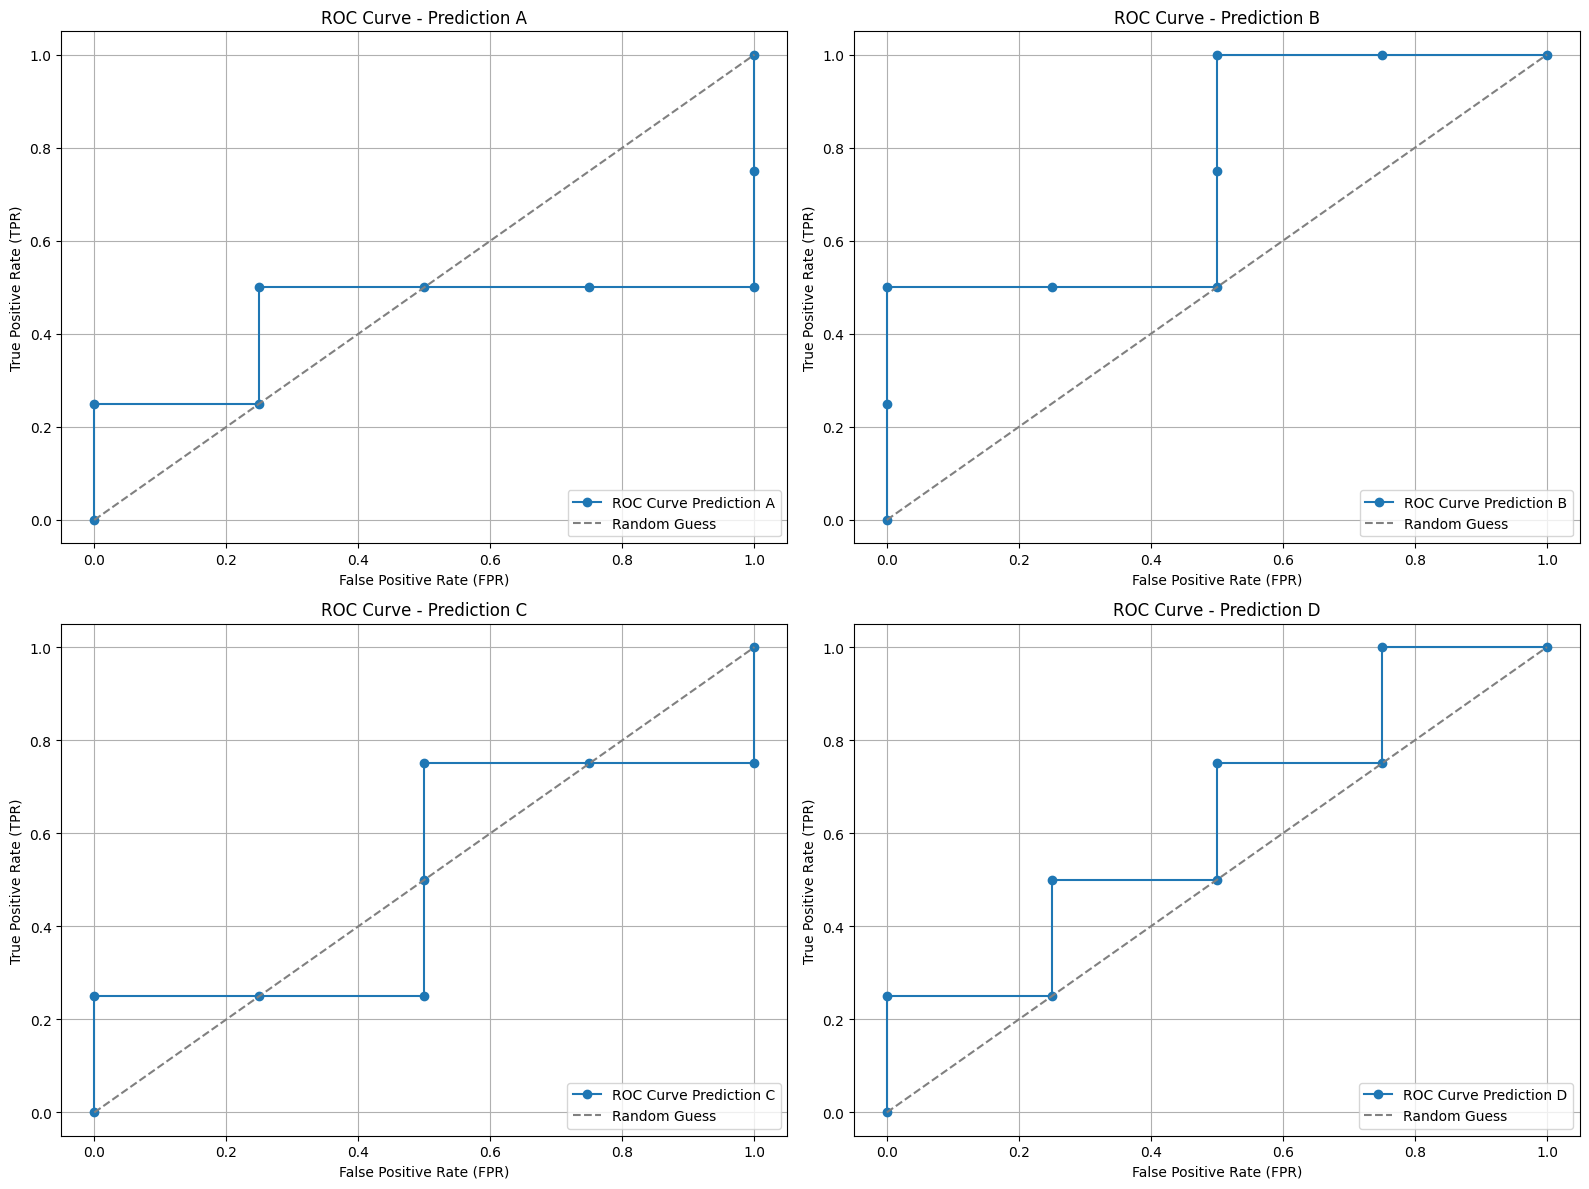

In [2]:
#Problem 1
import pandas as pd
import matplotlib.pyplot as plt

# Data for predictions
predictions = {
    "Prediction A": [("cross", 0.45), ("cross", 0.52), ("circle", 0.59), ("circle", 0.68),
                     ("circle", 0.73), ("cross", 0.75), ("circle", 0.9), ("cross", 0.92)],
    "Prediction B": [("circle", 0.45), ("circle", 0.52), ("cross", 0.59), ("cross", 0.68),
                     ("circle", 0.73), ("circle", 0.75), ("cross", 0.9), ("cross", 0.92)],
    "Prediction C": [("cross", 0.45), ("circle", 0.52), ("circle", 0.59), ("cross", 0.68),
                     ("cross", 0.73), ("circle", 0.75), ("circle", 0.9), ("cross", 0.92)],
    "Prediction D": [("circle", 0.45), ("cross", 0.52), ("circle", 0.59), ("cross", 0.68),
                     ("circle", 0.73), ("cross", 0.75), ("circle", 0.9), ("cross", 0.92)],
}

# Function to calculate ROC points
def calculate_roc_points(prediction):
    total_positives = sum(1 for cls, _ in prediction if cls == "cross")
    total_negatives = sum(1 for cls, _ in prediction if cls == "circle")
    
    # Sort by predicted probabilities in descending order
    sorted_prediction = sorted(prediction, key=lambda x: x[1], reverse=True)
    
    tpr, fpr = [0], [0]  # Start at (0, 0)
    tp, fp = 0, 0        # Initial true positives and false positives
    
    # Calculate TPR and FPR at each threshold
    for cls, _ in sorted_prediction:
        if cls == "cross":
            tp += 1
        else:
            fp += 1
        tpr.append(tp / total_positives)
        fpr.append(fp / total_negatives)
    
    return fpr, tpr

# Generate ROC curves
plt.figure(figsize=(16, 12))

for i, (name, prediction) in enumerate(predictions.items(), 1):
    fpr, tpr = calculate_roc_points(prediction)
    plt.subplot(2, 2, i)
    plt.plot(fpr, tpr, marker='o', linestyle='-', label=f'ROC Curve {name}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.grid(True)
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Prepare a table for LaTeX
table_data = []
for name, prediction in predictions.items():
    fpr, tpr = calculate_roc_points(prediction)
    probabilities = sorted([prob for _, prob in prediction], reverse=True) + [0.0]
    for idx, y in enumerate(probabilities):
        table_data.append({
            "Value (y)": y,
            f"Pred_{name[-1]}": prediction[idx][0] if idx < len(prediction) else "",
            f"TPR_{name[-1]}": tpr[idx],
            f"FPR_{name[-1]}": fpr[idx],
        })

# Combine the table data into a DataFrame
df_table = pd.DataFrame(table_data).sort_values(by="Value (y)", ascending=False).reset_index(drop=True)

# Generate LaTeX code for the table
latex_table = df_table.to_latex